# KNN (Method of Nearest Neighbor)

In this work, the method of nearest neighbors is implemented, which predicts the likelihood of heart disease from the presented characteristics in this dataset:

    https://www.kaggle.com/ronitf/heart-disease-uci
    
Objective: To find a pattern between these characteristics in order to predict the likelihood of heart disease in a patient.

We import the following libraries: numpy, pandas, as well as matplotlib and seaborn for data visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Installed additional options for working with data.

In [2]:
# Display up to 14 columns of a dataframe
pd.set_option('display.max_columns', 14)
# Set default font size
plt.rcParams['font.size'] = 24
sns.set(font_scale=2)

Open the file with the dataset and see what the table contains.

In [3]:
data = pd.read_csv('/home/akimg/Projects/ML_NeighborsClassifier-master/heart.csv')
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


We display the data type for each column and the number of missing values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Let's look at the correlation of the values in the table.

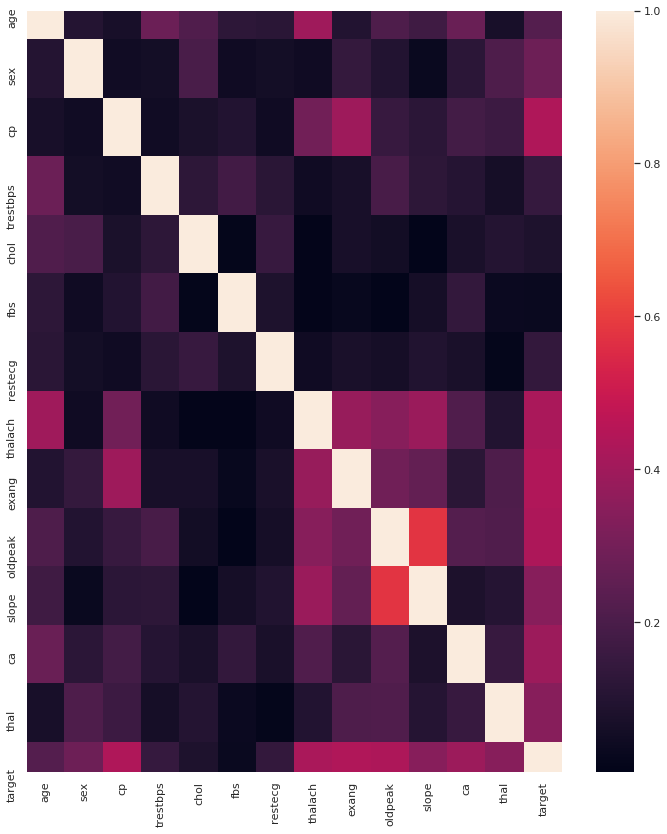

In [5]:
corr = data.corr().abs()
sns.set(rc={'figure.figsize':(12, 14)})
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

We remove from the sample features that are highly correlated with others. Remove from the dataset the columns: 'slope'.

In [6]:
extra_columns = ['slope']
data = data.drop(columns=list(extra_columns), axis='columns')

# Machine Learning

We select the target variable in our sample, and also divide it into the training and test ones.

In [7]:
X = data[data.columns[:-1]]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)

Let's see how the hyperparameter affects the quality of classification.

In [8]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6052631578947368

Create an empty dictionary. We will add the values of our "scores" to it. The keys will be the value of the hyperparameter, the values are the quality of work. Let us consider separately the quality on the training sample and on the test one.

In [9]:
train_scores = {}
test_scores = {}
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score
    print(current_train_score, current_test_score)

1.0 0.5526315789473685
0.801762114537445 0.5526315789473685
0.788546255506608 0.5789473684210527
0.7400881057268722 0.631578947368421
0.762114537444934 0.6578947368421053
0.7444933920704846 0.6447368421052632
0.7136563876651982 0.6842105263157895
0.7136563876651982 0.6710526315789473
0.7004405286343612 0.6710526315789473
0.6916299559471366 0.631578947368421
0.6872246696035242 0.6052631578947368
0.6916299559471366 0.6447368421052632
0.6784140969162996 0.6447368421052632
0.7004405286343612 0.6710526315789473
0.6696035242290749 0.6578947368421053
0.6828193832599119 0.6710526315789473
0.6784140969162996 0.6578947368421053
0.7004405286343612 0.6447368421052632
0.6784140969162996 0.6578947368421053
0.6828193832599119 0.6842105263157895
0.6784140969162996 0.6578947368421053
0.6872246696035242 0.631578947368421
0.6960352422907489 0.618421052631579
0.6960352422907489 0.631578947368421
0.7004405286343612 0.6447368421052632
0.6828193832599119 0.6578947368421053
0.6828193832599119 0.65789473684210

We will output the result of the script.

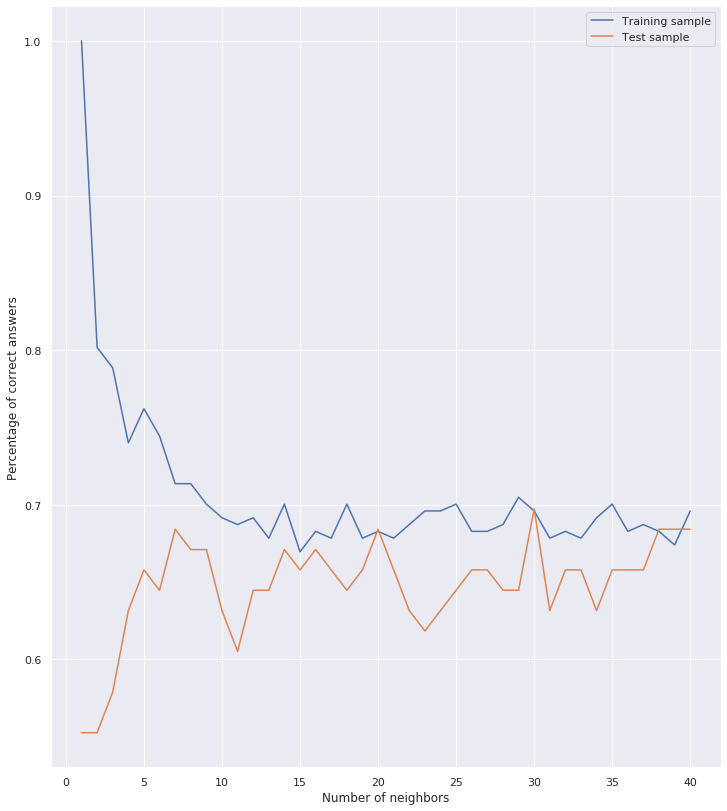

In [10]:
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Training sample')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Test sample')
plt.xlabel('Number of neighbors')
plt.ylabel('Percentage of correct answers')
plt.legend()
plt.show()